X matrix is :
 [[0 0]
 [1 1]
 [0 1]
 [1 0]]

Y matrix is :
 [[0]
 [1]
 [0]
 [0]]

Data of class 1 is - 
 [[0 0]
 [0 1]
 [1 0]]

Data of class 2 is - 
 [[1 1]]


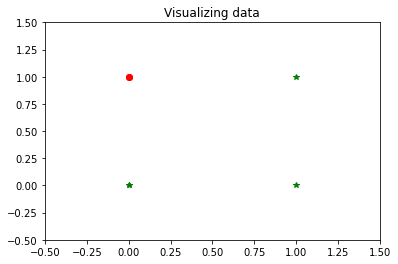


Mean vector for class 1 - 
 [[0.33333333]
 [0.33333333]]

Mean vector for class 2 - 
 [[1.]
 [1.]]

Prior probability for class 1 :  0.75

Prior probability for class 2 :  0.25

Covariance matrix of the data set -
 [[ 0.33333333 -0.16666667]
 [-0.16666667  0.33333333]]
a0 is :  [[-1.56805438]]

a1 is :  [-4.]

a2 is :  [-4.]

The decision boundary is : -1.568 + -4.000 * x1 + -4.000 * x2 = 0


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from math import log

# setting the matrices
x = np.array([[0,0],[1,1],[0,1],[1,0]])
print("X matrix is :\n",x)
y = np.array([0,1,0,0])
Y = y.reshape(4,1)
print("\nY matrix is :\n",Y)

# Classifying data according to class
loc1 = np.where(y == 0)
loc2 = np.where(y == 1)
x1 = x[loc1]
x2 = x[loc2]
print("\nData of class 1 is - \n",x1)
print("\nData of class 2 is - \n",x2)

#data visualization
plt.plot(x1,'g*', x2, 'ro')    
plt.xlim([-0.5,1.5])
plt.ylim([-0.5,1.5])
plt.title("Visualizing data")
plt.show()

# Calculating mean vector
mean_1 = np.mean(x1,axis = 0).reshape(2,1)
print("\nMean vector for class 1 - \n",mean_1)
mean_2 = np.mean(x2, axis = 0).reshape(2,1)
print("\nMean vector for class 2 - \n",mean_2)

# Calculating prior probabilities
pie_1 = x1.shape[0]/y.shape[0]
print("\nPrior probability for class 1 : ",pie_1)
pie_2 = x2.shape[0]/y.shape[0]
print("\nPrior probability for class 2 : ",pie_2)

# Calculating covariance matrix
cov = np.cov(x1[:,0],x1[:,1])

print("\nCovariance matrix of the data set -\n",cov)

# Defining the linear discriminant function
a0 = log(pie_1/pie_2) - (np.transpose(mean_1 - mean_2) @ np.linalg.inv(cov) @ (mean_1-mean_2))/2
print("a0 is : ",a0)

mu1_mu2 = mean_1 - mean_2
mu1_mu2_t = np.transpose(mu1_mu2)
cov_inv = np.linalg.inv(cov)

rem = cov_inv @ mu1_mu2
a1 = rem[0]
a2 = rem[1]
print("\na1 is : ",a1)
print("\na2 is : ",a2)

# Decision boundary
print("\nThe decision boundary is : {:.3f} + {:.3f} * x1 + {:.3f} * x2 = 0".format(a0[0][0],a1[0],
                                                                                   a2[0]))